# Лабораторная работа, Санникова Вика 381506-3
# Нахождение минимума функции и проверка выполнения условий ККТ в данных точках

### Задание: $$f(x_1,x_2) = (-(1.5(x_1+0.5))^2+x_2+2)^2+x_2^2$$ $$g_1(x_1,x_2)=-0.2x_1^2-x_2+0.5$$ $$g_2(x_1,x_2)=-x_1-x_2-1$$ $$g_3(x_1,x_2) = (x_1+1.5)^2-(x_2+1.5)^2 + 2$$

### Для начала введем исходные данные  $f_1(x_1, x_2), g_1(x_1,x_2), g_2(x_1,x_2), g_3(x_1,x_2)$ :


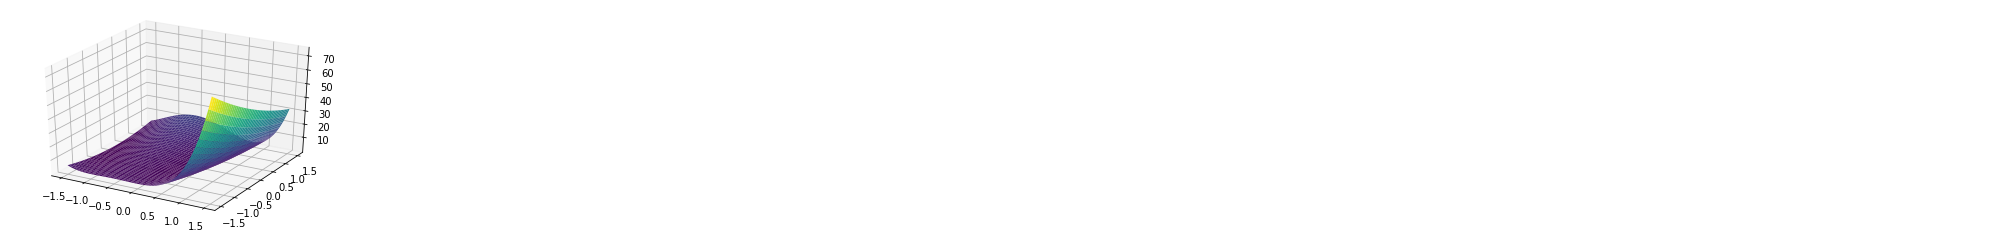

In [2]:
from sympy import *
from sympy.plotting import plot3d
import numpy as np
import matplotlib.pylab as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x1, x2 = symbols('x1 x2')
f = (-(1.5*(x1+0.5))**2+x2+2)**2+x2**2
g1 = -0.2*x1**2-x2+0.5
g2 = -x1-x2-1
g3 = (x1+1.5)**2-(x2+1.5)**2 + 2


#x1_m, x2_m = np.meshgrid(np.linspace(-1, 1, 500), np.linspace(-2, 0, 500))
#f_e=3*(x2_m+x1_m**2)**2+(x1_m**2-1)**2
#g1_e=x2_m+0.5*x1_m+0.5
#g2_e=-10*(x1_m+1)**2-(x2_m-2)**2+12
#g3_e=x2_m+0.8

d=1.5
plot3d(f,(x1,-d,d),(x2,-d,d))

### На отдальном графике изобразим линии уровня и ограничения $g_1(x_1,x_2), g_2(x_1,x_2), g_3(x_1,x_2)$ отметим их различными цветами для наглядности.

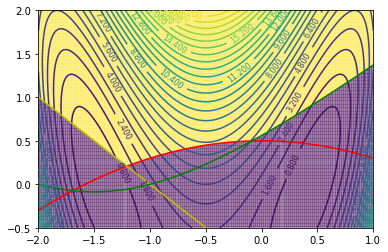

In [3]:
bound=2.0
x1_, x2_ = np.meshgrid(np.linspace(-2.0, 1.0, 500), np.linspace(-0.5, 2.0, 500))
f_=(-(1.5*(x1_+0.5))**2+x2_+2)**2+x2_**2
g1_=-0.2*x1_**2-x2_+0.5
g2_=-x1_-x2_-1
g3_ = (x1_+1.5)**2-(x2_+1.5)**2 + 2

plt.figure()
plt.pcolormesh(x1_, x2_, (g1_ <= 0) & (g2_ <=0) &(g3_<=0), alpha=0.1)
contours = plt.contour(x1_, x2_, f_, 25)
plt.clabel(contours, inline=True, fontsize=8)
contours = plt.contour(x1_, x2_, g1_, (0,), colors='r')
contours = plt.contour(x1_, x2_, g2_, (0,), colors='y')
contours = plt.contour(x1_, x2_, g3_, (0,), colors='g')

plt.show()

### По данному графику можно понять, что  наличие локального минимума возможно в точках из области выделенной красным прямоугольником. Возьмем из него точку близкую к 2 ограничению из допустимой области, например $(-1.3,0.75)$, обозначим ее красным цветом.


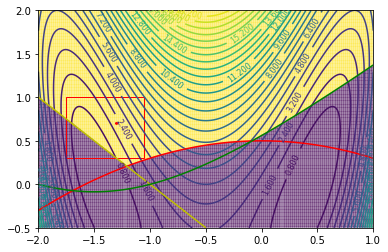

In [4]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

bound=2.0
x1_, x2_ = np.meshgrid(np.linspace(-2.0, 1.0, 500), np.linspace(-0.5, 2.0, 500))
f_=(-(1.5*(x1_+0.5))**2+x2_+2)**2+x2_**2
g1_=-0.2*x1_**2-x2_+0.5
g2_=-x1_-x2_-1
g3_ = (x1_+1.5)**2-(x2_+1.5)**2 + 2

plt.figure()
plt.pcolormesh(x1_, x2_, (g1_ <= 0) & (g2_ <=0) &(g3_<=0), alpha=0.1)
contours = plt.contour(x1_, x2_, f_, 25)
plt.clabel(contours, inline=True, fontsize=8)
contours = plt.contour(x1_, x2_, g1_, (0,), colors='r')
contours = plt.contour(x1_, x2_, g2_, (0,), colors='y')
contours = plt.contour(x1_, x2_, g3_, (0,), colors='g')

someX, someY = -1.75, 0.3
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX, someY), 0.7, 0.7, linewidth=1,edgecolor='r',facecolor='none'))
currentAxis.add_patch(Circle((-1.3,0.7), radius=0.01, color='r'))
plt.show()

### По графику можно заметить, что активным ограничением будет желтое - $g_2(x_1,x_2)$.

In [5]:
x1_=-1.3
x2_=0.7
initial_guess = np.array([x1_,x2_])

def con_g1(x):
    return -0.2*x[0]**2-x[1]+0.5
def con_g2(x):
    return -x[0]-x[1]-1
def con_g3(x):
    return -(x[0]+1.5)**2-(x[1]+1.5)**2 + 2

cons = {'type':'eq', 'fun': con_g2}

def func(x):
    return (-(1.5*(x[0]+0.5))**2+x[1]+2)**2+x[1]**2

print(opt.minimize(func, initial_guess, constraints=cons))

     fun: 0.30133404932074914
     jac: array([1.34951027, 1.34987633])
 message: 'Optimization terminated successfully.'
    nfev: 22
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([-1.5292545,  0.5292545])


### Получили точку минимума $(-1.5292545,  0.5292545)$. Изобразим эту точку на графике:

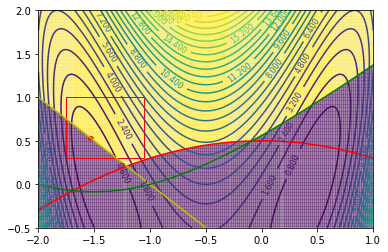

In [7]:
bound=2.0
x1_, x2_ = np.meshgrid(np.linspace(-2.0, 1.0, 500), np.linspace(-0.5, 2.0, 500))
f_=(-(1.5*(x1_+0.5))**2+x2_+2)**2+x2_**2
g1_=-0.2*x1_**2-x2_+0.5
g2_=-x1_-x2_-1
g3_ = (x1_+1.5)**2-(x2_+1.5)**2 + 2

plt.figure()
plt.pcolormesh(x1_, x2_, (g1_ <= 0) & (g2_ <=0) &(g3_<=0), alpha=0.1)
contours = plt.contour(x1_, x2_, f_, 25)
plt.clabel(contours, inline=True, fontsize=8)
contours = plt.contour(x1_, x2_, g1_, (0,), colors='r')
contours = plt.contour(x1_, x2_, g2_, (0,), colors='y')
contours = plt.contour(x1_, x2_, g3_, (0,), colors='g')

someX, someY = -1.75, 0.3
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX, someY), 0.7, 0.7, linewidth=1,edgecolor='r',facecolor='none'))
currentAxis.add_patch(Circle((-1.5292545,  0.5292545), radius=0.02, color='r'))
#currentAxis.add_patch(Circle((-1.3,0.7), radius=0.02, color='r'))
plt.show()



### Минимум функции находится в точке $(-1.5292545,  0.5292545)$ и равен $0.30133404932074914$ 
### Найдем радиенты функций $f(x_1,x_2), g_2(x_1,x_2)$. 

In [8]:
df_dx1 = diff(f, x1)
print (df_dx1)
df_dx2 = diff(f, x2)
print (df_dx2)

dg2_dx1 = diff(g2, x1)
print (dg2_dx1)
dg2_dx2 = diff(g2, x2)
print (dg2_dx2)

(-9.0*x1 - 4.5)*(x2 - (1.5*x1 + 0.75)**2 + 2)
4*x2 - 2*(1.5*x1 + 0.75)**2 + 4
-1
-1


### По графику функции можно определить, что  $f(x_1,x_2)$ - невыпуклая. Так же можно посчитать матрицу Гессе, она знако не определена, значит функция не является выпуклой.
### Теперь проверим условия ККТ для невыпуклого случая в дифференциальной форме
1) Точка $(-1.5292545,  0.5292545)$ очевидно допустима.  
2) Из условия стационарности найдем нетривиальные положительные $λ, λ_0$
  
### Составим систему уравнений $x_0=(-1.5292545,  0.5292545),  λ_0=1$ 
  
  $$−∇f(x_0)=λ∇g3(x_0)$$
  
  $$-((-9.0x_1 - 4.5)(x_2 - (1.5x_1 + 0.75)^2 + 2))=-λ$$ 
  $$-(4x_2 - 2(1.5x_1 + 0.75)^2 + 4)=-λ$$

In [9]:
def res(x1,x2):
    return 4*x2 - 2*(1.5*x1 + 0.75)**2 + 4
print(res(-1.5292545,  0.5292545))

def res1(x1,x2):
    return (-9.0*x1 - 4.5)*(x2 - (1.5*x1 + 0.75)**2 + 2)
print(res1(-1.5292545,  0.5292545))

1.3498762840338765
1.3495098971009052


### Таким образом, мы получили положительное $λ$, а это означает, что точка $x_0$ удовлетворят необходимым условиям для локального минимума. Все условия ККТ выполняются:
1) Допустимость  
2) Нетривипльность набора $(λ,λ0)$  
3) Неотрицательность $λ,λ0$  
4) Стационарность $-λ_0∇f(x_0)=λg_3(x_0)$  
5) Условия дополняющей нежесткости $λg_2(x_0)=0$